In [1]:
"""
Random Forest
Global Feature Selection 
    - X = 'Depth (m)', 'σ,v (kPa)', 'σ',v (kPa)', 'SBT (-)', 'SBTn (-)',
    'Mod. SBTn (-)', 'Oberhollenzer_classes', 'iso_classes_encoded'.

    
    - Y = 'qc (MPa)','fs (kPa)'.

Link: https://github.com/DowellChan/ResNetRegression
"""
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time

'''
PreProcessing
''' 
#Loading Database
df_cpt=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Target_Encoded_Database.csv')

#Transforming to DataFrame
df_cpt = pd.DataFrame(df_cpt)
df_cpt = df_cpt.drop(columns='Unnamed: 0')

#Dropping zeros from qc
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] < 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBT (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBTn (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['Mod. SBTn (-)']] == 0).any(axis = 1)]

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

'''
Inputs
'''
X = df_cpt[:, [1, 11, 17, 18, 19, 27]]

#1 --> 'Depth (m)' --> index: 1
#2 --> 'σ,v (kPa)' --> index: 9
#3 --> "σ',v (kPa)" --> index: 11
#4 --> 'SBT (-)' --> index: 17
#5 --> 'SBTn (-)' --> index: 18
#6 --> 'Mod. SBTn (-)' --> index: 19 
#7 --> 'Ic (-)' --> index: 21
#8 --> 'Ic SBT (-)' --> index:22 
#9 --> 'Ib (-)' --> index: 23
#10 --> 'Oberhollenzer_classes' --> index: 24
#11 --> 'iso_classes_encoded' --> index: 27

#X=X.to(device) #To GPU

'''
Outputs
'''
y = df_cpt[:, [2, 3]] 

#1 --> 'qc (MPa)' --> index: 2
#2 --> 'fs (kPa)' --> index: 3

#y=y.to(device) #To GPU

#Scaling the and preparing the data
#scalerX = MinMaxScaler()
#scalerY = MinMaxScaler()

#Scaling the Data
#scaledX=scalerX.fit_transform(X)
#scaledY=scalerY.fit_transform(y)

#Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.20)

In [2]:
from sklearn.ensemble import RandomForestRegressor
#Random forest Model
# model = RandomForestRegressor( n_estimators = 400, max_depth = 300,
#                               min_samples_split = 15, min_samples_leaf = 2)
model = RandomForestRegressor()


#Initial time
start_time = time.time()

#Fitting the model
model.fit(X_train, y_train)

#Final time
end_time = (time.time() - start_time)
print('The running time is: %.2f minutes' %(end_time/60))

The running time is: 6.77 minutes


In [3]:
#Making a prediction
y_pred = model.predict(X_test)

In [4]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_test, y_pred)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y_test, y_pred)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_test, y_pred)
print('The R2 is: %.4f' %r2)

print('____________________________________________')
#Metrics for the qc
print('Metrics for qc')
mae_qc = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
print('The mae is: %.4f MPa' %mae_qc)
mse_qc = mean_squared_error(y_test[:, 0], y_pred[:, 0])
print('The mse is: %.4f MPa' %mse_qc)
rmse_qc = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc)
r2_qc = r2_score(y_test[:, 0], y_pred[:, 0])
print('The R2 is: %.4f MPa' %r2_qc)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
print('The mae is: %.4f kPa' %mae_fs)
mse_fs = mean_squared_error(y_test[:, 1], y_pred[:, 1])
print('The mse is: %.4f kPa' %mse_fs)
rmse_fs = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs)
r2_fs= r2_score(y_test[:, 1], y_pred[:, 1])
print('The R2 is: %.4f kPa' %r2_fs)

Metrics Global
The mae is: 6.2976
The mse is: 469.4231
The rmse is: 21.6662
The R2 is: 0.8608
____________________________________________
Metrics for qc
The mae is: 0.7540 MPa
The mse is: 6.1987 MPa
The rmse is: 21.6662 MPa
The R2 is: 0.9071 MPa
____________________________________________
Metrics for fs
The mae is: 11.8411 kPa
The mse is: 932.6474 kPa
The rmse is: 21.6662 kPa
The R2 is: 0.8146 kPa


In [ ]:
# '''
# Saving the Model
# '''
# import joblib

# #Saving model as joblib file
# import os
# joblib.dump(model, 'CPT_RF_02_88_compress.joblib', compress = 3)
# print(f"Compressed Random Forest: {np.round(os.path.getsize('CPT_RF_02_88_compress.joblib') / 1024 / 1024, 2) } MB")

----
Plotting Metrics

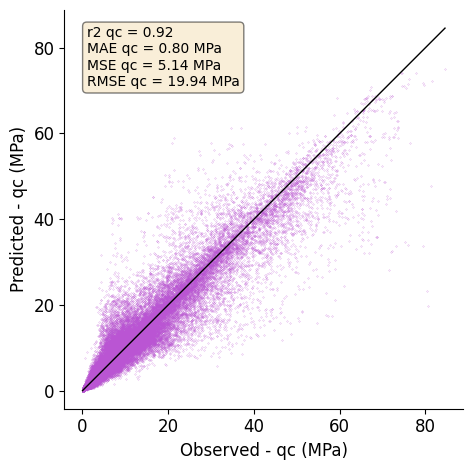

In [ ]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'r2 qc = %.2f' % (r2_qc), r'MAE qc = %.2f MPa' % (mae_qc, ),r'MSE qc = %.2f MPa' % (mse_qc, ), 
                     r'RMSE qc = %.2f MPa' % (rmse_qc, )))

p1 = max(max(y_pred[:, 0]), max(y_test[:, 0]))
p2 = min(min(y_pred[:, 0]), min(y_test[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_test[:, 0], y_pred[:, 0], s = .1, c = 'mediumorchid', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(1, 85,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 10, bbox = props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
ax.axis('scaled') #Scaling the plot
fig.tight_layout()
plt.savefig('Metrics_qc_testing.png', dpi = 600)

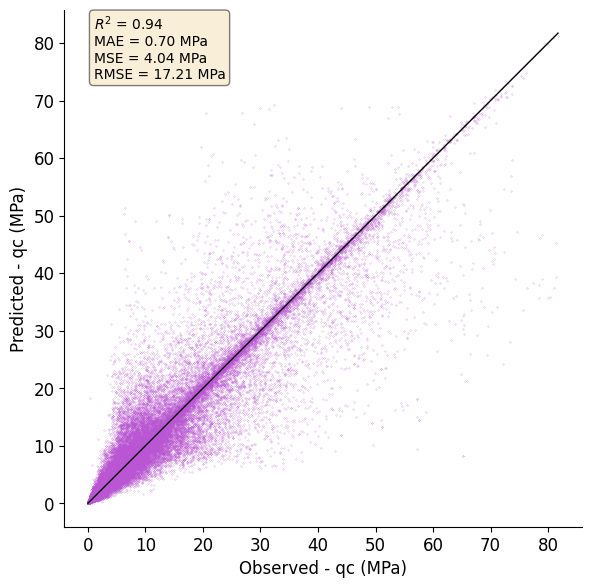

In [7]:
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'$R^2$ = %.2f' % (0.94),
                     r'MAE = %.2f MPa' % (0.70,), 
                     r'MSE = %.2f MPa' % (4.04,), 
                     r'RMSE = %.2f MPa' % (17.21,)))

p1 = max(max(y_pred[:, 0]), max(y_test[:, 0]))
p2 = min(min(y_pred[:, 0]), min(y_test[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_test[:, 0], y_pred[:, 0], s = .1, c = 'mediumorchid', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(1, 85,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 10, bbox = props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
ax.axis('scaled') #Scaling the plot
fig.set_size_inches(6, 6) # set figure size to 6 inches by 6 inches
fig.tight_layout()
plt.savefig('fig_13.png', dpi = 600)
plt.show()


IndexError: ignored

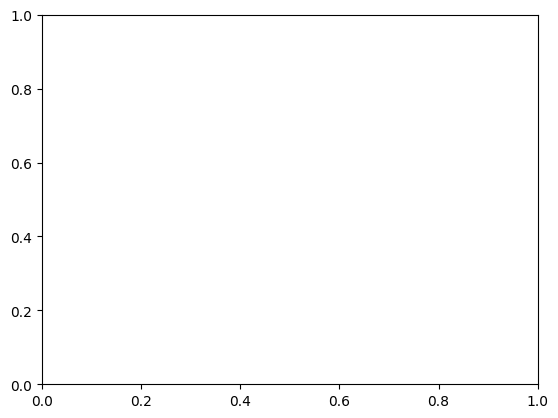

In [ ]:
# 'fs (kPa)' 
fig, ax = plt.subplots()


#Add the text
textstr = '\n'.join((r'r2 fs = %.2f' % (r2_fs), r'MAE fs = %.2f kPa' % (mae_fs, ),r'MSE fs = %.2f kPa' % (mse_fs, ), 
                     r'RMSE fs = %.2f kPa' % (rmse_fs, )))

p1 = max(max(y_pred[:, 1]), max(y_test[:, 1]))
p2 = min(min(y_pred[:, 1]), min(y_test[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_test[:, 1], y_pred[:, 1], s = .1, c = 'crimson', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(3, 1200,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 10, bbox = props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.axis('scaled') #Scaling the plot
ax.grid(False)
fig.tight_layout()
plt.savefig('Metrics_fs_testing.png', dpi = 600)

